In [94]:
# import packages
import scipy.io as sio
import matlab.engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
# connect matlab engine to the existing matlab session
eng = matlab.engine.connect_matlab()
eng.cd(r'C:\Users\ishparii\dev\SkyFall_GLM', nargout=0)
eng.ls(nargout=0)

EngineError: Unable to connect to MATLAB session 'MATLAB_10948'.

In [97]:
# run matlab script to put data together
data_CF = eng.TrainingDataSetup([],[],1,0) #location -use all; subjID - use all; n jitter - 1; condition - healthy

In [98]:
data_CF_np = np.array(data_CF)
data_CF_df = pd.DataFrame(data_CF_np)

print(data_CF_df.shape)
data_CF_df.head()


(2602, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.125901,0.077848,-0.112097,-0.011347,0.026207,0.056144,...,0.827352,-2.067576,1.370951,0.727249,0.049420,0.135441,0.055171,0.030166,0.091560,0.060249
1,1.0,1.0,1.0,3.0,-0.033489,0.214405,-0.042801,0.036700,0.163193,0.102776,...,0.959836,-1.320655,1.370951,0.544320,0.040074,0.131500,0.064495,0.057668,0.040334,0.029518
2,1.0,1.0,1.0,3.0,0.078853,0.225161,-0.003258,0.106326,0.214892,0.254953,...,1.985645,3.946246,1.370951,0.082254,0.040935,0.116699,0.070139,0.065564,0.061595,0.071664
3,1.0,1.0,1.0,4.0,-0.427013,0.124016,0.209373,-0.285074,0.104775,-0.032565,...,2.156472,4.686816,1.370951,0.393702,0.034751,0.106485,0.036636,0.047692,0.069517,0.017662
4,1.0,1.0,1.0,4.0,-0.258621,0.147098,0.127442,-0.136984,0.028601,-0.016087,...,2.010624,4.058232,1.370951,0.253397,0.035888,0.147006,0.043686,0.049197,0.026301,0.069618


In [99]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_CF_df=data_CF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_CF_df.to_csv('data_CF_10sec.csv')

data_CF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.125901,0.077848,-0.112097,-0.011347,0.026207,0.056144,...,0.827352,-2.067576,1.370951,0.727249,0.049420,0.135441,0.055171,0.030166,0.091560,0.060249
1,1.0,1.0,1.0,3.0,-0.033489,0.214405,-0.042801,0.036700,0.163193,0.102776,...,0.959836,-1.320655,1.370951,0.544320,0.040074,0.131500,0.064495,0.057668,0.040334,0.029518
2,1.0,1.0,1.0,3.0,0.078853,0.225161,-0.003258,0.106326,0.214892,0.254953,...,1.985645,3.946246,1.370951,0.082254,0.040935,0.116699,0.070139,0.065564,0.061595,0.071664
3,1.0,1.0,1.0,4.0,-0.427013,0.124016,0.209373,-0.285074,0.104775,-0.032565,...,2.156472,4.686816,1.370951,0.393702,0.034751,0.106485,0.036636,0.047692,0.069517,0.017662
4,1.0,1.0,1.0,4.0,-0.258621,0.147098,0.127442,-0.136984,0.028601,-0.016087,...,2.010624,4.058232,1.370951,0.253397,0.035888,0.147006,0.043686,0.049197,0.026301,0.069618


In [100]:
data_AF = eng.TrainingDataSetup([],[],1,1) #location -use all; subjID - use all; n jitter - 1; condition - amputees
# data_AF

In [101]:
data_AF_np = np.array(data_AF)
data_AF_df = pd.DataFrame(data_AF_np)

print(data_AF_df.shape)
data_AF_df.head()

(1601, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,3.0,0.0,9.0,0.152234,-0.431253,0.009568,-0.032451,-0.210494,-0.051874,...,2.077791,4.355384,1.370951,-0.006816,0.026533,0.054728,0.062460,0.060200,0.048826,0.044500
1,1.0,3.0,0.0,9.0,-0.013777,-0.165121,-0.049645,-0.011921,-0.164886,-0.049621,...,-0.017431,-2.426575,2.321928,-0.725191,0.029039,0.082529,0.041031,0.061260,0.050184,0.049987
2,1.0,3.0,0.0,9.0,-0.018117,-0.158916,-0.049124,-0.016485,-0.166230,-0.047156,...,2.156955,4.689407,1.370951,0.468556,0.030050,0.084234,0.079322,0.072924,0.041299,0.044606
3,1.0,3.0,0.0,9.0,-0.011725,-0.167109,-0.050006,-0.015319,-0.166011,-0.051451,...,2.135102,4.672102,1.921928,0.636765,0.024369,0.039472,0.047402,0.027406,0.023649,0.079729
4,1.0,3.0,0.0,9.0,-0.014867,-0.171112,-0.048433,-0.019685,-0.167537,-0.050042,...,2.209490,4.910050,1.370951,-0.151433,0.022384,0.038293,0.039684,0.028555,0.068377,0.033839


In [102]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_AF_df=data_AF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_AF_df.to_csv('data_AF_10sec.csv')

data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,3.0,0.0,9.0,0.152234,-0.431253,0.009568,-0.032451,-0.210494,-0.051874,...,2.077791,4.355384,1.370951,-0.006816,0.026533,0.054728,0.062460,0.060200,0.048826,0.044500
1,1.0,3.0,0.0,9.0,-0.013777,-0.165121,-0.049645,-0.011921,-0.164886,-0.049621,...,-0.017431,-2.426575,2.321928,-0.725191,0.029039,0.082529,0.041031,0.061260,0.050184,0.049987
2,1.0,3.0,0.0,9.0,-0.018117,-0.158916,-0.049124,-0.016485,-0.166230,-0.047156,...,2.156955,4.689407,1.370951,0.468556,0.030050,0.084234,0.079322,0.072924,0.041299,0.044606
3,1.0,3.0,0.0,9.0,-0.011725,-0.167109,-0.050006,-0.015319,-0.166011,-0.051451,...,2.135102,4.672102,1.921928,0.636765,0.024369,0.039472,0.047402,0.027406,0.023649,0.079729
4,1.0,3.0,0.0,9.0,-0.014867,-0.171112,-0.048433,-0.019685,-0.167537,-0.050042,...,2.209490,4.910050,1.370951,-0.151433,0.022384,0.038293,0.039684,0.028555,0.068377,0.033839


In [92]:
# read data from csv files
data_CF_df = pd.read_csv('data_CF_10sec.csv', index_col=0)
data_CF_df.head()

data_AF_df = pd.read_csv('data_AF_10sec.csv', index_col=0)
data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,2.0,1.0,0.0,3.0,-0.279859,-0.451830,-0.122443,-0.014085,-0.168879,-0.048789,...,1.813089,3.258443,1.921928,0.317397,0.411891,0.951311,0.266262,0.182220,0.152750,0.223859
1,2.0,1.0,0.0,3.0,-0.381852,-0.552207,-0.178741,-0.008815,-0.160477,-0.048607,...,2.077591,4.353338,1.370951,0.515837,0.029718,0.084029,0.023951,0.069011,0.018963,0.044672
2,2.0,1.0,0.0,3.0,-0.467158,-0.504300,-0.164920,-0.011402,-0.180339,-0.048061,...,1.356249,0.837893,1.370951,-0.222621,0.498879,2.195032,0.441074,0.104369,0.141824,0.152883
3,2.0,1.0,0.0,4.0,0.596201,0.219927,-0.109469,0.007806,0.228406,0.039248,...,2.041599,4.195732,1.370951,0.756499,0.090853,0.213672,0.101003,0.101458,0.154579,0.176697
4,2.0,1.0,0.0,4.0,0.412108,0.032183,-0.187147,-0.009107,-0.148790,-0.052507,...,2.235633,4.998432,0.721928,0.481000,0.053629,0.115405,0.152212,0.076841,0.049582,0.080558


In [103]:
# make right and left latheral falls as 1 category
data_CF_df.loc[data_CF_df.label == 4, ['label']] = 3
data_AF_df.loc[data_AF_df.label == 4, ['label']] = 3

# change amputee subjects ids
max_id_CF = data_CF_df.subj_id.max()
print(max_id_CF)
data_AF_df.subj_id = data_AF_df.subj_id + max_id_CF
print(data_AF_df.subj_id.unique())

10.0
[ 11.  12.  13.  14.  15.  16.]


In [8]:
# training and testing data split
#data_train = data_CF_df.loc[data_CF_df['location'] == 1]
#data_test = data_AF_df.loc[data_AF_df['location'] == 1]

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_train = data_CF_df[(data_CF_df.location == 1) & ((data_CF_df.label>0) & (data_CF_df.label<=4))]
data_test = data_AF_df[(data_AF_df.location == 1) & ((data_AF_df.label>0) & (data_AF_df.label<=4))]

print(data_train.shape)
print(data_test.shape)

(1091, 1215)
(728, 1215)


In [115]:
# mix data
import random
from sklearn.utils import shuffle

data = data_CF_df
full_data = data.append(data_AF_df)

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
full_data = full_data[(full_data.location == 2) & ((full_data.label>0) & (full_data.label<4))]
print("Data size: ", full_data.shape)
print()

subj_ids = np.sort(np.array(full_data.subj_id.unique()))
print("All subjects ids: ",subj_ids)

# first and last 2 subjects ids for testing
test_subjects = subj_ids[np.r_[0:1, -1:0]]
print("Subjects for testing: ",test_subjects)

train_subjects = np.setdiff1d(subj_ids,test_subjects)
print("Subjects for training: ",train_subjects)

data_train = full_data.loc[full_data['subj_id'].isin(train_subjects)]
data_test = full_data.loc[full_data['subj_id'].isin(test_subjects)]
# group data by subject
#groups = full_data.groupby('subj_id')
#groups.head()

#random.shuffle(groups)

#for g, grp in groups:
#    print (grp)

#data = pd.DataFrame(groups)
#print(data.shape)
#data.head()

#data_train, data_test = train_test_split(data, test_size=0.3)
print("Training data size: ", data_train.shape)
print("Testing data size: ",data_test.shape)

Data size:  (113, 1215)

All subjects ids:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Subjects for testing:  [  1.  10.]
Subjects for training:  [ 2.  3.  4.  5.  6.  7.  8.  9.]
Training data size:  (89, 1215)
Testing data size:  (24, 1215)


In [116]:
# list of features
features = list(range(4,1215))
features = np.array(features)

In [117]:
# handpicking features

# feature groups:
#       1 - Raw Signal Statistics
#       2 - Raw Signal Correlation Coefficients
#       3 - Raw Signal 5s FFT bins
#       4 - Raw Signal 1s FFT bins
#		5 - Derivative Statistics
#		6 - Derivative 5s FFT bins
#		7 - Derivative 1s FFT bins
#		8 - Resultant Vector and Magnitude 
#		9 - Angle Statistics (ArcTan)
#		10 - Entropies
#		11 - Raw Signal Cross Products
#		12 - Derivative Cross Products
#		13 - Raw Signal Statistics on 1s FFT bins
#		14 - Raw Signal Entropies on 1s FFT bins
#		15 - Raw Signal Statistics on 1s binned signal energy
#		16 - Derivative Statistics on 1s FFT bins
#		17 - Derivative Entropies on 1s FFT bins
#		18 - Barometer

features_to_use = eng.getFeatureInds(matlab.logical([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]))

features_to_use = np.array(features_to_use)
features_to_use = [y for x in features_to_use for y in x] # flatten array
features_to_use = np.array(features_to_use)

features = features[features_to_use]
print(features)
print(len(features))

[   4    5    6    7    8    9   10   11   12   13   14   15   16   17   18
   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48
   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78
   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93
   94   95   96   97   98   99  340  341  342  343  344  345  346  347  348
  349  350  351  352  353  354  355  356  357  358  359  360  361  362  363
  364  365  366  367  368  369  370  371  372  373  374  375  376  377  378
  379  380  381  382  383  384  385  386  387  388  389  390  391  392  393
  394  395  396  397  398  399  400  401  402  403  404  405  406  407  408
  409  410  411  412  413  414  415  416  606  607  608  609  610  611  612
  613  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  629  

Feature ranking:
1. feature 150 (0.012130)
2. feature 323 (0.009932)
3. feature 213 (0.009832)
4. feature 20 (0.009000)
5. feature 162 (0.008694)
6. feature 311 (0.008607)
7. feature 19 (0.008175)
8. feature 294 (0.007971)
9. feature 200 (0.007834)
10. feature 94 (0.007643)
11. feature 303 (0.007534)
12. feature 292 (0.007199)
13. feature 43 (0.007007)
14. feature 28 (0.006690)
15. feature 16 (0.006497)
16. feature 192 (0.006326)
17. feature 178 (0.005866)
18. feature 336 (0.005824)
19. feature 133 (0.005729)
20. feature 282 (0.005704)
21. feature 175 (0.005634)
22. feature 99 (0.005591)
23. feature 88 (0.005512)
24. feature 304 (0.005369)
25. feature 216 (0.005355)
26. feature 195 (0.005298)
27. feature 15 (0.005248)
28. feature 335 (0.005208)
29. feature 31 (0.005201)
30. feature 207 (0.005124)
31. feature 91 (0.005024)
32. feature 272 (0.004987)
33. feature 191 (0.004972)
34. feature 291 (0.004923)
35. feature 290 (0.004897)
36. feature 205 (0.004897)
37. feature 151 (0.004797)
38. 

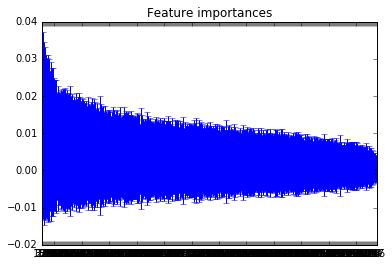

In [118]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = data_train[features]
Y = data_train['label']

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [119]:
# normalize feature importances
importances = np.array(importances)
importances /= importances.max()

# select features > 25 % importance
features = [i for i,j in zip(features,importances) if j > 0.25]

X = data_train[features]
Y = data_train['label']

print ("Selected number of features: %d" % len(features))

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Selected number of features: 111
1. feature 150 (1.000000)
2. feature 323 (0.818830)
3. feature 213 (0.810602)
4. feature 20 (0.742006)
5. feature 162 (0.716766)
6. feature 311 (0.709607)
7. feature 19 (0.673930)
8. feature 294 (0.657148)
9. feature 200 (0.645838)
10. feature 94 (0.630089)
11. feature 303 (0.621115)
12. feature 292 (0.593498)
13. feature 43 (0.577651)
14. feature 28 (0.551514)
15. feature 16 (0.535644)
16. feature 192 (0.521540)
17. feature 178 (0.483615)
18. feature 336 (0.480110)
19. feature 133 (0.472322)
20. feature 282 (0.470270)
21. feature 175 (0.464513)
22. feature 99 (0.460924)
23. feature 88 (0.454437)
24. feature 304 (0.442632)
25. feature 216 (0.441477)
26. feature 195 (0.436801)
27. feature 15 (0.432620)
28. feature 335 (0.429323)
29. feature 31 (0.428741)
30. feature 207 (0.422398)
31. feature 91 (0.414192)
32. feature 272 (0.411134)
33. feature 191 (0.409885)
34. feature 291 (0.405839)
35. feature 290 (0.403743)
36. feature 205 (0.403732)
37. feature 151

In [120]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier

In [121]:
# Different models to try
#       Model name ---------------------------------------------------------------------
#      Parameters ------------------------------------------                           |
#     Classifier -----------                               |                           |
#                          |                               |                           |
#                          v                               v                           |
models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [1, 3, 5, 7, 10, 20],# |
                                           'min_samples_leaf': [1, 3, 5, 7, 10, 20],#  v
                                           'max_depth': [5, 10, 20, 30, 40, 50, 100]}, "Decision Tree"]
          ]

models.append([svm.SVC(), {'kernel': ['rbf'], 
                           'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5], 
                           'C': [0.001, 0.01, 0.1, 1, 3, 5, 7, 10]}, "Support Vector Machines"])

models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 5, 10, 15, 20, 30, 50]}, "K-Nearest Neighbors"])

models.append([linear_model.LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 3, 5, 7, 10, 12, 15]}, "Logistic Regression"])

models.append([ RandomForestClassifier(), {'n_estimators': [1, 5, 10, 20, 50],
                                          'max_depth': [5, 10, 20, 30, 50],
                                          'min_samples_leaf': [1, 3, 5, 7, 10, 20, 50],
                                          'min_samples_split': [1, 3, 5, 7, 10]
                                          }, "Random Forest"])

models_with_best_params = []

for model in models:
    clf = GridSearchCV(model[0], model[1], cv=5)
    clf.fit(X, Y)
    best_params = clf.best_params_
    best_estimator = clf.best_estimator_
    
    model_with_best_params = [best_estimator, best_params, model[2]]
    
    models_with_best_params.append(model_with_best_params)

    print("Best parameters for ", model[2], " set found on development set:", best_params)
    print()
    print("Best estimator for ", model[2], " model:", best_estimator)
# print(clf_tree.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# for params, mean_score, scores in clf_tree.grid_scores_:
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean_score, scores.std() * 2, params))
# print()

print(models_with_best_params)


Best parameters for  Decision Tree  set found on development set: {'min_samples_leaf': 1, 'max_depth': 20, 'min_samples_split': 1}

Best estimator for  Decision Tree  model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best parameters for  Support Vector Machines  set found on development set: {'kernel': 'rbf', 'C': 10, 'gamma': 1e-05}

Best estimator for  Support Vector Machines  model: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best parameters for  K-Nearest Neighbors  set found on development set: {'n_neighbors': 5}

Best estimator for  K-Nearest Neighbors  model: KNeighborsClassifier

In [122]:
#fitting models to test_data
for model in models_with_best_params:
    classifier = model[0]
    classifier.fit(X, Y)
    score = classifier.score(data_test[features], data_test['label'])
    print("Prediction accuracy for", model[2], "model is", score)
    expected = data_test['label']
    predicted = classifier.predict(data_test[features])

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy for Decision Tree model is 0.541666666667
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'):
             precision    recall  f1-score   support

        1.0       0.33      0.17      0.22         6
        2.0       0.38      0.83      0.53         6
        3.0       0.88      0.58      0.70        12

avg / total       0.62      0.54      0.54        24


Confusion matrix:
[[1 5 0]
 [0 5 1]
 [2 3 7]]
Prediction accuracy for Support Vector Machines model is 0.583333333333
Classification report for classifier SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.00